In [3]:
import os
import sys
sys.path.append('..')
import pickle
import numpy as np
from matplotlib import pyplot as plt

In [4]:
with open(r'/home/jgammell/Desktop/mi_leakage_localization/outputs/adversarial_synthetic_unprotected__big_lr/lambda=0.2/results.pickle', 'rb') as f:
    unprotected_results = pickle.load(f)
unprotected_lambda = 0.2
unprotected_leakage_assessment = unprotected_lambda * unprotected_results['erasure_probs']
unprotected_leaking_point = unprotected_results['train_dataset'].leaking_subbytes_cycles[0]
with open(r'/home/jgammell/Desktop/mi_leakage_localization/outputs/adversarial_synthetic_no_ops__big_lr/lambda=0.04/results.pickle', 'rb') as f:
    no_ops_results = pickle.load(f)
no_ops_lambda = 0.04
no_ops_leakage_assessment = no_ops_lambda * no_ops_results['erasure_probs']
no_ops_leaking_points = [no_ops_results['train_dataset'].leaking_subbytes_cycles[0]]
no_ops_leaking_points = [no_ops_leaking_points[0], no_ops_leaking_points[0] + no_ops_results['train_dataset'].max_no_ops]
with open(r'/home/jgammell/Desktop/mi_leakage_localization/outputs/adversarial_synthetic_shuffling__big_lr/lambda=0.001/results.pickle', 'rb') as f:
    shuffling_results = pickle.load(f)
shuffling_lambda = 0.001
shuffling_leakage_assessment = shuffling_lambda * shuffling_results['erasure_probs']
shuffling_leaking_points = shuffling_results['train_dataset'].leaking_subbytes_cycles
with open(r'/home/jgammell/Desktop/mi_leakage_localization/outputs/synth_boolean_masked_lambda_sweep/lambda=0.001/results.pickle', 'rb') as f:
    masking_results = pickle.load(f)
masking_lambda = 0.01
masking_leakage_assessment = masking_lambda * masking_results['erasure_probs']
leaking_mask = masking_results['train_dataset'].leaking_mask_cycles[0]
leaking_masked_subbytes = masking_results['train_dataset'].leaking_masked_subbytes_cycles[0]

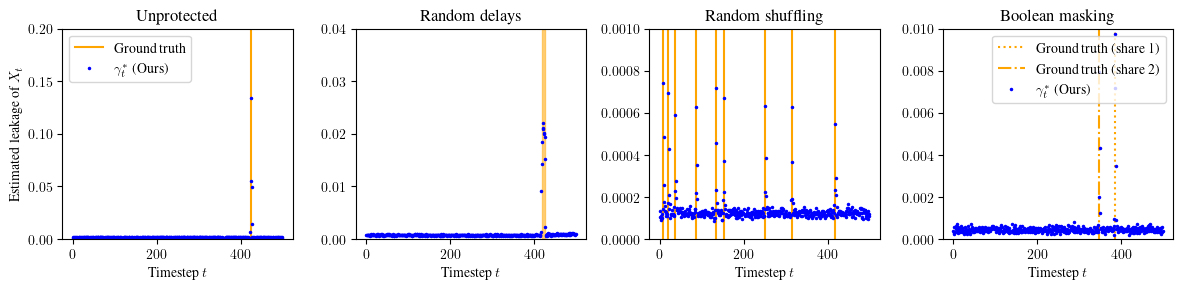

In [5]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes[0].axvline(unprotected_leaking_point, color='orange', label='Ground truth')
axes[0].plot(unprotected_leakage_assessment, color='blue', marker='.', markersize=3, linestyle='none', label='$\gamma_t^*$ (Ours)')
axes[1].axvspan(*no_ops_leaking_points, color='orange', alpha=0.5)
axes[1].plot(no_ops_leakage_assessment, color='blue', marker='.', markersize=3, linestyle='none')
for leaking_point in shuffling_leaking_points:
    axes[2].axvline(leaking_point, color='orange')
axes[2].plot(shuffling_leakage_assessment, color='blue', marker='.', markersize=3, linestyle='none')
axes[3].axvline(leaking_mask, linestyle='dotted', color='orange', label='Ground truth (share 1)')
axes[3].axvline(leaking_masked_subbytes, linestyle='dashdot', color='orange', label='Ground truth (share 2)')
axes[3].plot(masking_leakage_assessment, color='blue', marker='.', markersize=3, linestyle='none', label='$\gamma_t^*$ (Ours)')
axes[0].set_ylim(0, unprotected_lambda)
axes[1].set_ylim(0, no_ops_lambda)
axes[2].set_ylim(0, shuffling_lambda)
axes[3].set_ylim(0, masking_lambda)
for ax in axes:
    ax.set_xlabel('Timestep $t$')
axes[0].set_ylabel('Estimated leakage of $X_t$')
axes[0].set_title('Unprotected')
axes[1].set_title('Random delays')
axes[2].set_title('Random shuffling')
axes[3].set_title('Boolean masking')
axes[0].legend()
axes[3].legend()
fig.tight_layout()
fig.savefig(r'/home/jgammell/Desktop/mi_leakage_localization/outputs/plots/synthetic_demo.pdf')